# Tut 4b - Hopper using Lagrange Mechanics
**Aim:** To model the monopod using a joint space formulation, which will hopefully be more stable and robust than the system space version.

## Generalized forces - a deeper dive
The reason I wanted to introduce you to the system space method, even though it results in a more finicky model, is that I personally find it much easier to conceptualize the way joints work when you're thinking about individual links in that classic Newtonian sort of way. Regardless of which coordinate set you decide to base your model around, working on interesting problems is probably still going to involve a lot of flipping between the world and joint frames, so in my opinion, you can only really get a strong understanding of the dynamics by being comfortable in both the Newtonian and the Lagrangian headspaces.

The thing I find personally tricky about representing joints (and the action of forces more broadly) using Lagrange mechanics is that the concept of direction becomes a little hazy, and can be confusing when you try to project it from joint coordinates back into world coordinates. Take our familiar old pendulum, for example:

<img src = "pendulum_force2.png" width = "300">

We actuate the second joint by introducing a torque acting in the direction of $\theta_2$. In joint space, this makes perfect sense: positive $\tau$ acts to increase the angle $\theta_2$. But because $\theta_2$ is a relative angle, the direction of positive $\tau$ can only be explained in the absolute world frame in terms of its effects on individual links: it rotates link 1 clockwise and link 2 anticlockwise.

The prismatic joint is even trickier, because it introduces a bit of ambiguity about which coordinates should be affected at all. Consider the following system, where we've simplified the problem by reducing it to only the $x$ dimension in the world frame:

<img src = "prismatic1D.png" width = "400">

We decide our generalized coordinates should be the position of the first link's COM, $x_1$, and the length of the joint, $r$. The force $F$ acts to increase $r$, but wouldn't it also push the first link backwards and therefore influence $x_1$?

I've already given you a quick and dirty explanation of generalized forces that's probably sufficient for making things work, but it wasn't strictly correct in some ways. To truly *get* these two examples, we need to dig deeper into the details.

### Clarifying the terminology
**WTF is a virtual displacement, even?**
The virtual displacement isn't actually used to calculate the generalized force, but it might still be beneficial to understand what it is, and how it relates to the quantities we do actually use.

The Wikipedia definition (paraphrased) is that a virtual displacement is "an infinitesimally small change of coordinates occurring while time is held constant." The "virtual" part refers to the fact that no actual displacement can happen without time passing. It's only a concept that makes sense and becomes useful in the context of constrained motion - rather than representing any actual motion that happens, its purpose is to indicate the directions in which motion *can* happen. 

To poach from Wikipedia further, imagine a bead sliding along a circular hoop. A good generalized coordinate for its position would be $\mathbf{q} = \theta$. The bead is able to move in the direction $\theta$, represented by the virtual displacement $\delta \theta$. But what about in the world frame? 

<img src = "hoop.png" width = "300">

The world position of the bead is given by the coordinates $[x,y]$. The link between the two coordinate frames is the vector $\mathbf{r} = [R cos(\theta), R sin(\theta)]$, which represents the world position in terms of the generalized coordinates (more on this guy in a second). The virtual displacement in world terms is given by $$\mathbf{\delta r} = \sum_{j} \frac{\partial \mathbf{r}}{\partial q_j} \delta q_j$$

The loop only has one generalized coordinate, so the only $q_j$ we have to think about is $\theta$. Thus, $$\mathbf{\delta r} = \frac{\partial \mathbf{r}}{\partial \theta} \delta \theta = [-R sin(\theta)\delta \theta, R cos(\theta) \delta \theta]$$ which clearly indicates that the bead is constrained to only move in a direction tangent to the circle.

**More on the position vector.** Previously, I said $\mathbf{r}$ is the position in the world frame where the force acts expressed in terms of the generalized coordinates. That was the 'technically not correct but still works-ish' part of my previous explanation. 

It's actually the world-frame position of *the whole system* as a function of the generalized coordinates. It's not even really a vector when you think of it that way, or rather, it's not a single vector: you need one for each rigid body in your system. 

So for each link $i$, you have an $\mathbf{r_i} = [x_i(\mathbf{q}), y_i(\mathbf{q}), \theta_i(\mathbf{q})]$.

(Or, if you're not a flatlander, $\mathbf{r_i} = [x_i(\mathbf{q}), y_i(\mathbf{q}), z_i(\mathbf{q}), \theta_i(\mathbf{q}), \phi_i(\mathbf{q}), \psi_i(\mathbf{q})]$)

**Calculating the generalized force - a better explanation:**
Say you want to calculate the component of some action $F$ acting in the direction of a generalized coordinate $q_j$. 

(I'm going to refer to this component as $Q_j$, but beware that this notation actually refers to the *total* force in the direction of that coordinate. So if you had a bunch of actions going on, of which $F_k$ is just one, $Q_j = \sum_{k}Q_{j,k}F_k$. But I don't feel like getting bogged down in subscript Hell, so let's just go with $Q_j$.)

The formula is $$Q_j = \sum_{i}\mathbf{F_i} \cdot \frac{\partial \mathbf{r_i}}{\partial q_j}$$

where $\mathbf{F_i}$ is the world-frame vector expressing how $F$ affects the $i$th link. So, $Q_j$ is a combination of the effects of the force on all of the individual bodies in the system. 

### Example 1: the pendulum, revisited

For link 1, $\mathbf{r_1} = \begin{pmatrix} \frac{1}{2}l_1 sin(\theta_1) 
\\ -\frac{1}{2}l_1 cos(\theta_1) 
\\ \theta_1 \end{pmatrix}$ and for link 2, $\mathbf{r_2} = \begin{pmatrix} l_1 sin(\theta_1) + \frac{1}{2}l_2 sin (\theta_1 + \theta_2) 
\\-l_1 cos(\theta_1) -\frac{1}{2}l_2 cos(\theta_1 + \theta_2)
\\ \theta_1 + \theta_2 \end{pmatrix}$.

I'll leave calculating the Jacobians for each link up to you. (Remember, $\frac{\partial \mathbf{r_i}}{\partial q_j}$ is the $j$th column of the Jacobian.)

**The horizontal force:**

$\mathbf{F_1} = \begin{pmatrix} 0\\0\\0 \end{pmatrix}$ because the force doesn't act on link 1.

$\mathbf{F_2} = \begin{pmatrix} F\\0\\F \frac{1}{2}l_2 cos(\theta_1+\theta_2) \end{pmatrix}$

$Q_{\theta_1} = \mathbf{F_1} \cdot \frac{\partial \mathbf{r_1}}{\partial \theta_1} + \mathbf{F_2} \cdot \frac{\partial \mathbf{r_2}}{\partial \theta_1} = F l_1 cos(\theta_1) + F l_2 cos(\theta_1 + \theta_2)$

And $Q_{\theta_2} = \mathbf{F_1} \cdot \frac{\partial \mathbf{r_1}}{\partial \theta_2} + \mathbf{F_2} \cdot \frac{\partial \mathbf{r_2}}{\partial \theta_2} = F l_2 cos(\theta_1 + \theta_2)$

**The rotary joint:**

$\mathbf{\tau_1} = \begin{pmatrix} 0\\0\\-\tau \end{pmatrix}$ 

$\mathbf{\tau_2} = \begin{pmatrix} 0\\0\\ \tau \end{pmatrix}$

Do thing, get $Q_{\theta_1} = -\tau + \tau = 0$ and $Q_{\theta_2} = \tau$.

### Example 2: prismatic joint

Using $x$ for the COM of the left link, $r_1 = x$ and $r_2 = x + r$. (Yes, I'm still using $r$ for the length of the joint. Any confusion is everybody else's fault for deciding $\mathbf{r_i}$ is a sensible symbol for world-frame position.) 

$F_1 = -F$ and $F_2 = F$.

Do the thing, get $Q_{x} = -F + F = 0$ and $Q_{r} = F$.

Now, one vast digression later, we're ready to do this for a 2D system in the code.

In [1]:
#%reset
# DERIVE THE EOMs SYMBOLICALLY ----------------------------------------------------------------------------------------------

# import libraries
import sympy as sym
import numpy as np

sym.init_printing()
from IPython.display import display #for pretty printing

# create symbolic variables

# system parameters
g = sym.symbols('g')
mb,ml1,ml2 = sym.symbols(['m_{body}','m_{leg1}','m_{leg2}']) # mass
lb,ll1,ll2 = sym.symbols(['l_{body}','l_{leg1}','l_{leg2}']) # length
Inb,Inl1,Inl2 = sym.symbols(['I_{body}','I_{leg1}','I_{leg2}']) # moment of intertia

# generalized coordinates
x,y,thb,thl,r = sym.symbols(['x','y','\\theta_{body}','\\theta_{leg}','r']) 
dx,dy,dthb,dthl,dr = sym.symbols(['\dot{x}','\dot{y}','\dot{\\theta}_{body}','\dot{\\theta}_{leg}','\dot{r}']) 
ddx,ddy,ddthb,ddthl,ddr = sym.symbols(['\ddot{x}','\ddot{y}','\ddot{\\theta}_{body}','\ddot{\\theta}_{leg}','\ddot{r}']) 

q = sym.Matrix([[x],[y],[thb],[thl],[r]])
dq = sym.Matrix([[dx],[dy],[dthb],[dthl],[dr]])
ddq = sym.Matrix([[ddx],[ddy],[ddthb],[ddthl],[ddr]])

# forces
# total joint action = actuator + rebound, but that will be dealt with elsewhere
F,tau,GRFx,GRFy = sym.symbols(['F','\\tau','G_x','G_y']) 

# STEP 1: position vectors ri = [x,y,theta] (world frame)
rb = sym.Matrix([[x],
                [y],
                [thb]])

rl1 = sym.Matrix([[x + 0.5*ll1*sym.sin(thb + thl)],
                [y - 0.5*ll1*sym.cos(thb + thl)],
                [thb + thl]])

rl2 = sym.Matrix([[x + (0.5*ll1+r)*sym.sin(thb + thl)],
                [y - (0.5*ll1+r)*sym.cos(thb + thl)],
                [thb + thl]])

# the Jacobians
Jb = rb.jacobian(q)
Jl1 = rl1.jacobian(q)
Jl2 = rl2.jacobian(q)

# STEP 2: generate expressions for the system space velocities from the jacobians
vb = Jb*dq
vl1 = Jl1*dq
vl2 = Jl2*dq

# STEP 3: generate expressions for the kinetic and potential energy
# mass vectors
Mb = sym.Matrix([[mb,mb,Inb]])
Ml1 = sym.Matrix([[ml1,ml1,Inl1]])
Ml2 = sym.Matrix([[ml2,ml2,Inl2]])

T = 0.5*Mb*sym.matrix_multiply_elementwise(vb,vb) + 0.5*Ml1*sym.matrix_multiply_elementwise(vl1,vl1) + 0.5*Ml2*sym.matrix_multiply_elementwise(vl2,vl2)
T = T[0]
V = mb*g*rb[1] + ml1*g*rl1[1] + ml2*g*rl2[1]


# STEP 4: calculate each term of the Lagrange equation
# term 1
Lg1 = sym.zeros(len(q),1)
for i in range(len(q)):
    dT_ddq = sym.Matrix([sym.diff(T,dq[i])]) # get partial of T in dq_i
    Lg1[i] = dT_ddq.jacobian(q)*dq + dT_ddq.jacobian(dq)*ddq #...then get time derivative of that partial

# term 3
Lg3 = sym.Matrix([T]).jacobian(q).transpose() # partial of T in q

# term 4
Lg4 = sym.Matrix([V]).jacobian(q).transpose() # partial of U in q

# STEP 5: generalized forces

# force vectors for each link
tau_b = sym.Matrix([[0],[0],[-tau]])
tau_l1 = sym.Matrix([[0],[0],[tau]])

F_l1 = sym.Matrix([[-F*sym.sin(thb+thl)],[F*sym.cos(thb+thl)],[0]])
F_l2 = sym.Matrix([[F*sym.sin(thb+thl)],[-F*sym.cos(thb+thl)],[0]])

GRF_l2 = sym.Matrix([[GRFx],[GRFy],[0.5*ll2*GRFx*sym.cos(thb+thl)+0.5*ll2*GRFy*sym.sin(thb+thl)]])

Q = sym.zeros(len(q),1)
for j in range(len(q)):
    Q[j] = tau_b.transpose()*Jb[:,j]+(tau_l1+F_l1).transpose()*Jl1[:,j]+(F_l2+GRF_l2).transpose()*Jl2[:,j]

# AND combine!
EOM = Lg1 - Lg3 + Lg4 - Q

EOMs = sym.zeros(len(q),1)
for j in range(len(q)):
    EOMs[j] = EOM[j].simplify()
    
# the simplification step is a little time-consuming so try to avoid re-running this cell if possible.

In [2]:
# Lambdify
from pyomo.environ import*
from pyomo.opt import SolverFactory
from pyomo.opt import SolverStatus, TerminationCondition

func_map = {'sin':sin, 'cos':cos} 

sym_list = [g,mb,ml1,ml2,lb,ll1,ll2,Inb,Inl1,Inl2,
            x,y,thb,thl,r,
            dx,dy,dthb,dthl,dr,
            ddx,ddy,ddthb,ddthl,ddr,
            F,tau,GRFx,GRFy]
            
lambEOM_x = sym.lambdify(sym_list,EOMs[0],modules = [func_map])
lambEOM_y = sym.lambdify(sym_list,EOMs[1],modules = [func_map])
lambEOM_thb = sym.lambdify(sym_list,EOMs[2],modules = [func_map])
lambEOM_thl = sym.lambdify(sym_list,EOMs[3],modules = [func_map])
lambEOM_r = sym.lambdify(sym_list,EOMs[4],modules = [func_map])

In [3]:
# rerun from here if you don't want to calculate the EOM's again
if 'm' in globals():
    del m # deletes the model
    
m = ConcreteModel()

# SETS-----------------------------------------------------------------------------------------------------------------------

N = 100
m.N = RangeSet(N) 

links = [('body',1),('leg',1),('leg',2)]
m.L = Set(dimen=2, initialize = links)

DOFs = ['x','y','theta_b','theta_l','r'] # generalized coordinates
m.DOF = Set(initialize = DOFs) 

# PARAMETERS-----------------------------------------------------------------------------------------------------------------

m.g = Param(initialize = 9.81)

def get_m(n, lb, ln):
    if lb == 'body':
        return 5.0
    else: return 2.5
m.m = Param(m.L, initialize = get_m) # mass of links

def get_len(n, lb, ln):
    if lb == 'body':
        return 1.0
    else: return 0.5
m.len = Param(m.L, initialize = get_len) # length of links

def calculate_In(m, lb, ln): 
    l = (lb,ln)
    # yes, that does mean you have to rebuild the tuple inside the function. Yes, it is dumb.
    return m.m[l]*m.len[l]**2/12 
m.In = Param(m.L, initialize = calculate_In) # moment of inertia

mbody = sum(m.m[l] for l in links)
BW = mbody*m.g.value

# VARIABLES -----------------------------------------------------------------------------------------------------------------

# system coordinates
m.q = Var(m.N, m.DOF) # position
m.dq = Var(m.N, m.DOF) # velocity
m.ddq = Var(m.N, m.DOF) # acceleration

# bound variables
for n in range(1,N+1):
    for l in links:
        m.q[n,'y'].setlb(0.0)

In [4]:
# TIME AND INTEGRATION

# variable timestep
hm = 0.02 # master timestep
m.h = Var(m.N, bounds = (0.8,1.2))

# Integration constraints 
def BwEuler_p(m,n,dof): # for positions
    if n > 1:
        return m.q[n,dof] == m.q[n-1,dof] + hm*m.h[n]*m.dq[n,dof]
    else:
        return Constraint.Skip #use this to leave out members of a set that the constraint doesn't apply to
m.integrate_p = Constraint(m.N, m.DOF, rule = BwEuler_p)

def BwEuler_v(m,n,dof): # for velocities
    if n > 1:
        return m.dq[n,dof] == m.dq[n-1,dof] + hm*m.h[n]*m.ddq[n-1,dof]
    else:
        return Constraint.Skip 
m.integrate_v = Constraint(m.N, m.DOF, rule = BwEuler_v)

### Protip: lambdify your aux variable definitions
As you add links to the leg, the expressions for the positions, and especially the velocities of the contacts get very unweildly very quickly. Luckily, the LORD hath given unto us sympy, that we need fear no kerfuffle. Blessed be the name of the LORD, *amen*. I use it to get the horizontal foot velocity.

In [5]:
# GROUND INTERACTIONS -------------------------------------------------------------------------------------------------------

# paramters
m.mu = Param(initialize = 1) # friction coefficient

# sign set for positive and negative components
signs = ['ps','ng'] 
m.sgn = Set(initialize = signs)

WDOFs = ['X','Y',"THETA"] # absolute coordinates (see what I mean about switching between frames the whole time...?)
m.WDOF = Set(initialize = WDOFs) 

# variables
m.footp = Var(m.N, m.WDOF, bounds = (0.0,None)) # foot position
m.footv = Var(m.N, m.WDOF, m.sgn, bounds = (0.0,None)) # foot velocity

m.friction_cone = Var(m.N, bounds = (0.0,None))

m.GRF = Var(m.N, m.WDOF, m.sgn, bounds = (0.0,None)) # ground reaction forces

ground_constraints = ['contact','friction','slip_ps','slip_ng'] 
m.ground_constraints = Set(initialize = ground_constraints) # set for indexing ground-related penalties
m.ground_penalty = Var(m.N, m.ground_constraints, bounds = (0.0,None))

# constraints: aux variables
def def_footp(m,n,dof):
    if dof == 'Y':
        L = 0.5*m.len[('leg',1)] + m.q[n,'r'] + 0.5*m.len[('leg',2)] # total leg length
        thA = m.q[n,'theta_b'] + m.q[n,'theta_l'] # absolute leg angle
        return m.footp[n,dof] == m.q[n,'y'] - L*cos(thA)
    else:
        return Constraint.Skip
m.def_footp = Constraint(m.N, m.WDOF, rule = def_footp)

# lambdify the foot velocity
footx = sym.Matrix([x + (0.5*ll1+r+0.5*ll2)*sym.sin(thb + thl)])
footdx = footx.jacobian(q)*dq
footdx = footdx[0].simplify()
lamb_footdx = sym.lambdify(sym_list,footdx,modules = [func_map])

def def_footv(m,n,dof):
    if dof == 'X':
        var_list = [m.g,m.m[('body',1)],m.m[('leg',1)],m.m[('leg',2)],
            m.len[('body',1)],m.len[('leg',1)],m.len[('leg',2)],
            m.In[('body',1)],m.In[('leg',1)],m.In[('leg',2)],
            m.q[n,'x'],m.q[n,'y'],m.q[n,'theta_b'],m.q[n,'theta_l'],m.q[n,'r'],
            m.dq[n,'x'],m.dq[n,'y'],m.dq[n,'theta_b'],m.dq[n,'theta_l'],m.dq[n,'r'],
            m.ddq[n,'x'],m.ddq[n,'y'],m.ddq[n,'theta_b'],m.ddq[n,'theta_l'],m.ddq[n,'r'],
            0,0,0,0]
        return m.footv[n,dof,'ps']-m.footv[n,dof,'ng'] == lamb_footdx(*var_list)
    else:
        return Constraint.Skip
m.def_footv = Constraint(m.N, m.WDOF, rule = def_footv)

def def_friction_cone(m,n):
    return m.friction_cone[n] == m.mu*m.GRF[n,'Y','ps'] - (m.GRF[n,'X','ps'] + m.GRF[n,'X','ng'])
m.def_friction_cone = Constraint(m.N, rule = def_friction_cone)

# constraints: complementarity

# contact
def ground_contact(m,n):
    if n < N:
        return m.ground_penalty[n,'contact'] == m.footp[n+1,'Y']*m.GRF[n,'Y','ps'] 
    else:
        return Constraint.Skip
m.ground_contact = Constraint(m.N, rule = ground_contact)

# friction
def ground_friction(m,n):
    return m.ground_penalty[n,'friction'] == (m.footv[n,'X','ps']+m.footv[n,'X','ng'])*m.friction_cone[n]
m.ground_friction = Constraint(m.N, rule = ground_friction)

# slipping
def ground_slip_ps(m,n):
    return m.ground_penalty[n,'slip_ps'] == m.footv[n,'X','ps']*m.GRF[n,'X','ps']
m.ground_slip_ps = Constraint(m.N, rule = ground_slip_ps)

def ground_slip_ng(m,n):
    return m.ground_penalty[n,'slip_ng'] == m.footv[n,'X','ng']*m.GRF[n,'X','ng']
m.ground_slip_ng = Constraint(m.N, rule = ground_slip_ng)

# bound contact forces at last node
for dof in WDOFs:
    for sgn in signs:
        m.GRF[N,dof,sgn].value = 0
        m.GRF[N,dof,sgn].fixed = True

In [6]:
# HARD JOINT STOPS ----------------------------------------------------------------------------------------------------------

# sets
joints = ['hip','knee']
m.J = Set(initialize = joints)

joint_constraints = ['up','lo'] # set of joint penalties
m.joint_constraints = Set(initialize = joint_constraints)

# parameters
hip_bound = [-np.pi/2,np.pi/2]
m.hip_bound = Param(m.joint_constraints, initialize = {'up':hip_bound[1],'lo':hip_bound[0]}) 

knee_bound = [0.0,0.5]
m.knee_bound = Param(m.joint_constraints, initialize = {'up':knee_bound[1],'lo':knee_bound[0]})

# we can bound the joint coordinates directly
for n in range(1,N+1):
    m.q[n,'theta_l'].setlb(hip_bound[0])
    m.q[n,'theta_l'].setub(hip_bound[1])
    m.q[n,'r'].setlb(knee_bound[0])
    m.q[n,'r'].setub(knee_bound[1])

# variables
m.tau_a = Var(m.N, bounds = (-2,2)) # actuator torque at hip
m.tau_r = Var(m.N, m.sgn, bounds = (0.0,None)) # rebound torque

m.F_a = Var(m.N, bounds = (-3,3)) # actuator force at knee
m.F_r = Var(m.N, m.sgn, bounds = (0.0,None)) # rebound force (acts parallel to the leg)

m.joint_penalty = Var(m.N, m.J, m.joint_constraints, bounds = (0.0,None))

# complementarity
def hip_limits(m,n,jc):
    if n < N:
        if jc == 'up':
            # NEXT angle
            return m.joint_penalty[n,'hip',jc] == (m.hip_bound['up'] - m.q[n+1,'theta_l'])*m.tau_r[n,'ng']
        else:
            return m.joint_penalty[n,'hip',jc] == (m.q[n+1,'theta_l'] - m.hip_bound['lo'])*m.tau_r[n,'ps']
    else:
        return Constraint.Skip
m.hip_limits = Constraint(m.N, m.joint_constraints, rule = hip_limits)

def knee_limits(m,n,jc):
    if n < N:
        if jc == 'up':
            # NEXT distance
            return m.joint_penalty[n,'knee',jc] == (m.knee_bound['up'] - m.q[n+1,'r'])*m.F_r[n,'ng']
        else:
            return m.joint_penalty[n,'knee',jc] == (m.q[n+1,'r'] - m.knee_bound['lo'])*m.F_r[n,'ps']
    else:
        return Constraint.Skip
m.knee_limits = Constraint(m.N, m.joint_constraints, rule = knee_limits)

# bound contact forces at last node
for sgn in signs:
    m.F_r[N,sgn].value = 0
    m.F_r[N,sgn].fixed = True

for sgn in signs:
    m.tau_r[N,sgn].value = 0
    m.tau_r[N,sgn].fixed = True

In [7]:
# COST FUNCTION -------------------------------------------------------------------------------------------------------------

# minimum time

def CostFun(m):
    T = sum(m.h[n] for n in range(1,N+1))
    penalty_sum = 0
    for n in range(1,N+1):
        for gc in ground_constraints:
            penalty_sum += m.ground_penalty[n,gc]
        for jc in joint_constraints:
            for j in joints:
                penalty_sum += m.joint_penalty[n,j,jc]
    return T+1000*penalty_sum
m.Cost = Objective(rule = CostFun)

In [8]:
# EQUATIONS OF MOTION -------------------------------------------------------------------------------------------------------
S = BW

def EOM_x(m,n):
    F_in = S*(m.F_a[n] + m.F_r[n,'ps'] - m.F_r[n,'ng'])
    tau_in = S*(m.tau_a[n] + m.tau_r[n,'ps'] - m.tau_r[n,'ng'])
    Gx_in = S*(m.GRF[n,'X','ps']-m.GRF[n,'X','ng'])
    Gy_in = S*(m.GRF[n,'Y','ps'])
    
    var_list = [m.g,m.m[('body',1)],m.m[('leg',1)],m.m[('leg',2)],
            m.len[('body',1)],m.len[('leg',1)],m.len[('leg',2)],
            m.In[('body',1)],m.In[('leg',1)],m.In[('leg',2)],
            m.q[n,'x'],m.q[n,'y'],m.q[n,'theta_b'],m.q[n,'theta_l'],m.q[n,'r'],
            m.dq[n,'x'],m.dq[n,'y'],m.dq[n,'theta_b'],m.dq[n,'theta_l'],m.dq[n,'r'],
            m.ddq[n,'x'],m.ddq[n,'y'],m.ddq[n,'theta_b'],m.ddq[n,'theta_l'],m.ddq[n,'r'],
            F_in,tau_in,Gx_in,Gy_in]
    return lambEOM_x(*var_list) == 0
m.EOM_x = Constraint(m.N, rule = EOM_x)

def EOM_y(m,n):
    F_in = S*(m.F_a[n] + m.F_r[n,'ps'] - m.F_r[n,'ng'])
    tau_in = S*(m.tau_a[n] + m.tau_r[n,'ps'] - m.tau_r[n,'ng'])
    Gx_in = S*(m.GRF[n,'X','ps']-m.GRF[n,'X','ng'])
    Gy_in = S*(m.GRF[n,'Y','ps'])
    
    var_list = [m.g,m.m[('body',1)],m.m[('leg',1)],m.m[('leg',2)],
            m.len[('body',1)],m.len[('leg',1)],m.len[('leg',2)],
            m.In[('body',1)],m.In[('leg',1)],m.In[('leg',2)],
            m.q[n,'x'],m.q[n,'y'],m.q[n,'theta_b'],m.q[n,'theta_l'],m.q[n,'r'],
            m.dq[n,'x'],m.dq[n,'y'],m.dq[n,'theta_b'],m.dq[n,'theta_l'],m.dq[n,'r'],
            m.ddq[n,'x'],m.ddq[n,'y'],m.ddq[n,'theta_b'],m.ddq[n,'theta_l'],m.ddq[n,'r'],
            F_in,tau_in,Gx_in,Gy_in]
    return lambEOM_y(*var_list) == 0
m.EOM_y = Constraint(m.N, rule = EOM_y)

def EOM_thb(m,n):
    F_in = S*(m.F_a[n] + m.F_r[n,'ps'] - m.F_r[n,'ng'])
    tau_in = S*(m.tau_a[n] + m.tau_r[n,'ps'] - m.tau_r[n,'ng'])
    Gx_in = S*(m.GRF[n,'X','ps']-m.GRF[n,'X','ng'])
    Gy_in = S*(m.GRF[n,'Y','ps'])
    
    var_list = [m.g,m.m[('body',1)],m.m[('leg',1)],m.m[('leg',2)],
            m.len[('body',1)],m.len[('leg',1)],m.len[('leg',2)],
            m.In[('body',1)],m.In[('leg',1)],m.In[('leg',2)],
            m.q[n,'x'],m.q[n,'y'],m.q[n,'theta_b'],m.q[n,'theta_l'],m.q[n,'r'],
            m.dq[n,'x'],m.dq[n,'y'],m.dq[n,'theta_b'],m.dq[n,'theta_l'],m.dq[n,'r'],
            m.ddq[n,'x'],m.ddq[n,'y'],m.ddq[n,'theta_b'],m.ddq[n,'theta_l'],m.ddq[n,'r'],
            F_in,tau_in,Gx_in,Gy_in]
    return lambEOM_thb(*var_list) == 0
m.EOM_thb = Constraint(m.N, rule = EOM_thb)

def EOM_thl(m,n):
    F_in = S*(m.F_a[n] + m.F_r[n,'ps'] - m.F_r[n,'ng'])
    tau_in = S*(m.tau_a[n] + m.tau_r[n,'ps'] - m.tau_r[n,'ng'])
    Gx_in = S*(m.GRF[n,'X','ps']-m.GRF[n,'X','ng'])
    Gy_in = S*(m.GRF[n,'Y','ps'])
    
    var_list = [m.g,m.m[('body',1)],m.m[('leg',1)],m.m[('leg',2)],
            m.len[('body',1)],m.len[('leg',1)],m.len[('leg',2)],
            m.In[('body',1)],m.In[('leg',1)],m.In[('leg',2)],
            m.q[n,'x'],m.q[n,'y'],m.q[n,'theta_b'],m.q[n,'theta_l'],m.q[n,'r'],
            m.dq[n,'x'],m.dq[n,'y'],m.dq[n,'theta_b'],m.dq[n,'theta_l'],m.dq[n,'r'],
            m.ddq[n,'x'],m.ddq[n,'y'],m.ddq[n,'theta_b'],m.ddq[n,'theta_l'],m.ddq[n,'r'],
            F_in,tau_in,Gx_in,Gy_in]
    return lambEOM_thl(*var_list) == 0
m.EOM_thl = Constraint(m.N, rule = EOM_thl)

def EOM_r(m,n):
    F_in = S*(m.F_a[n] + m.F_r[n,'ps'] - m.F_r[n,'ng'])
    tau_in = S*(m.tau_a[n] + m.tau_r[n,'ps'] - m.tau_r[n,'ng'])
    Gx_in = S*(m.GRF[n,'X','ps']-m.GRF[n,'X','ng'])
    Gy_in = S*(m.GRF[n,'Y','ps'])
    
    var_list = [m.g,m.m[('body',1)],m.m[('leg',1)],m.m[('leg',2)],
            m.len[('body',1)],m.len[('leg',1)],m.len[('leg',2)],
            m.In[('body',1)],m.In[('leg',1)],m.In[('leg',2)],
            m.q[n,'x'],m.q[n,'y'],m.q[n,'theta_b'],m.q[n,'theta_l'],m.q[n,'r'],
            m.dq[n,'x'],m.dq[n,'y'],m.dq[n,'theta_b'],m.dq[n,'theta_l'],m.dq[n,'r'],
            m.ddq[n,'x'],m.ddq[n,'y'],m.ddq[n,'theta_b'],m.ddq[n,'theta_l'],m.ddq[n,'r'],
            F_in,tau_in,Gx_in,Gy_in]
    return lambEOM_r(*var_list) == 0
m.EOM_r = Constraint(m.N, rule = EOM_r)

In [9]:
# # HIGH DROP -----------------------------------------------------------------------------------------------------------------

# # initial condition
# m.q[1,'x'].value = 0.0
# m.q[1,'y'].value = 3.0
# m.q[1,'theta_b'].value = 0.0
# m.q[1,'theta_l'].value = 0.0
# m.q[1,'r'].value = 0.25

# for dof in DOFs:
#     m.q[1,dof].fixed = True
#     m.dq[1,dof].value = 0.0
#     m.dq[1,dof].fixed = True
    
# for n in range(1,N+1):
#     m.F_a[n].value = 0.0
#     m.F_a[n].fixed = True
#     m.tau_a[n].value = 0.0
#     m.tau_a[n].fixed = True
    
# #m.pprint()

In [10]:
# # LOW DROP ------------------------------------------------------------------------------------------------------------------

# # initial condition
# m.q[1,'x'].value = 0.0
# m.q[1,'theta_b'].value = 0.0
# m.q[1,'theta_l'].value = 0.0
# m.q[1,'r'].value = 0.25

# m.footp[1,'Y'].value = 0.1
# m.footp[1,'Y'].fixed = True

# for dof in DOFs:
#     if dof != 'y':
#         m.q[1,dof].fixed = True
#     m.dq[1,dof].value = 0.0
#     m.dq[1,dof].fixed = True
    
# for n in range(1,N+1):
#     m.F_a[n].value = 0.0
#     m.F_a[n].fixed = True
#     m.tau_a[n].value = 0.0
#     m.tau_a[n].fixed = True
    
# #m.pprint()

In [11]:
# # STANDING ------------------------------------------------------------------------------------------------------------------

# # initial condition
# m.q[1,'x'].value = 0.0
# m.q[1,'theta_b'].value = 0.0
# m.q[1,'theta_l'].value = 0.0
# m.q[1,'r'].value = 0.25

# m.footp[1,'Y'].value = 0.0
# m.footp[1,'Y'].fixed = True

# for dof in DOFs:
#     if dof != 'y':
#         m.q[1,dof].fixed = True
#     m.dq[1,dof].value = 0.0
#     m.dq[1,dof].fixed = True
    
# for n in range(1,N+1):
#     m.F_a[n].value = 0.0
#     m.F_a[n].fixed = True
#     m.tau_a[n].value = 0.0
#     m.tau_a[n].fixed = True
    
# #m.pprint()

In [12]:
# # HOP -----------------------------------------------------------------------------------------------------------------------

# # initial condition
# m.q[1,'x'].value = 0.0
# m.q[1,'theta_b'].value = 0.0
# m.q[1,'theta_l'].value = 0.0
# m.q[1,'r'].value = 0.25

# m.footp[1,'Y'].value = 0.0
# m.footp[1,'Y'].fixed = True

# for dof in DOFs:
#     if dof != 'y':
#         m.q[1,dof].fixed = True
#     m.dq[1,dof].value = 0.0
#     m.dq[1,dof].fixed = True
    
# # final condition
# m.q[N,'y'].setlb(1.2)
    
# #m.pprint()

### Random ground reaction forces
I often find it beneficial to randomize the ground reaction forces, assuming the model is stable enough to handle it. Sometimes if I leave the GRF's uninitialized, the model appears to be 'avoiding' the ground - obviously it doesn't do this consciously, I suspect it just gets stuck in a region of the solution space where the GRFs are mostly zero. It's something worth trying if your model appears to think a flying leap is the best motion for all situations.

In [13]:
# INITIALIZE ----------------------------------------------------------------------------------------------------------------
guide = np.linspace(0,5.0,N)
for n in range(1,N+1):
    m.q[n,'x'].value = guide[n-1] + np.random.uniform(-0.25,0.25)
    m.q[n,'y'].value  = np.random.uniform(0.5,1.1)
    m.q[n,'theta_b'].value  = np.random.uniform(-np.pi/8,np.pi/8)
    m.q[n,'theta_l'].value  = np.random.uniform(-np.pi/4,np.pi/4)
    m.q[n,'r'].value  = np.random.uniform(0.0,0.5)
    
    m.GRF[n,'Y','ps'].value = np.random.uniform(0.0,1)
    m.GRF[n,'X','ps'].value = m.mu.value*m.GRF[n,'Y','ps'].value

## Tax Day Sprint
Since this model is a bit more resiliant, I'm going to give it a slightly trickier task: the tax day sprint. The previous hopper executed a "missing the boat" sprint - it just had to reach 5 metres as fast as possible and we didn't care what it was doing once it got there. Picture the robot bouncing as fast as it can to the end of the jetty and then leaping onto a boat that's already sailing away... perhaps while being pursued by ringwraiths after being ambushed at an inn. Clearly, the only thing that matters is that it ends up on the boat.

For the tax day sprint, the situation we're picturing is that our dude is late to file its taxes and has to hop rapidly to the mail box to post them. (Yes, this world where monopedal robots are advanced enough to be worthy of SARS's attention still uses conventional snail mail.) While sprinting up to the box and slam-dunking its forms in would certainly be the cooler approach, the more practical one would involve coming to a halt in an upright position. Long story short, the tax day condition means we care about the robot's final position and velocity, not just the distance it reaches. There are varying degrees of strictness, but at the very least, the foot should be on the ground, the tilt angle of the body should be within some margin (or the height of the torso above some level) an the horizontal velocity should be zero.

If you're wondering where these weird task names come from, check out <a href = "https://www.researchgate.net/profile/Monica_Daley/publication/301404270_Do_limit_cycles_matter_in_the_long_run_Stable_orbits_and_sliding-mass_dynamics_emerge_in_task-optimal_locomotion/links/57295a7208ae057b0a03434a/Do-limit-cycles-matter-in-the-long-run-Stable-orbits-and-sliding-mass-dynamics-emerge-in-task-optimal-locomotion.pdf">this paper</a> by ATRIAS team member, RAM Group collaborator and *Survivor: David vs. Goliath* star Christian Hubicki. (His publications are always worth checking out - come for the science, stay for the puns :) )


In [14]:
# SPRINT --------------------------------------------------------------------------------------------------------------------
# tax day

# initial condition
m.q[1,'x'].value = 0.0
m.q[1,'theta_b'].value = 0.0
m.q[1,'theta_l'].value = 0.0

m.q[1,'x'].fixed = True
m.q[1,'theta_b'].fixed = True
m.q[1,'theta_l'].fixed = True

m.footp[1,'Y'].value = 0.0
m.footp[1,'Y'].fixed = True

for dof in DOFs:
    m.dq[1,dof].value = 0.0
    m.dq[1,dof].fixed = True
      
# final condition
m.q[N,'x'].setlb(5.0)

m.dq[N,'x'].value = 0.0
m.dq[N,'x'].fixed = 0.0
m.dq[N,'theta_b'].value = 0.0
m.dq[N,'theta_b'].fixed = 0.0
m.dq[N,'theta_l'].value = 0.0
m.dq[N,'theta_l'].fixed = 0.0

m.q[N,'theta_b'].value = 0.0
m.q[N,'theta_l'].value = 0.0
m.q[N,'theta_b'].fixed = True
m.q[N,'theta_l'].fixed = True

m.footp[N,'Y'].value = 0.0
m.footp[N,'Y'].fixed = True
    
#m.pprint()

In [15]:
# solving
#opt = SolverFactory('ipopt') # standard issue, garden variety ipopt

#opt = SolverFactory('ipopt',executable = 'C:/cygwin64/home/Stacey/CoinIpopt/build/bin/ipopt.exe')
opt = SolverFactory('ipopt') 
#opt.options["linear_solver"] = 'ma86'

# solver options
opt.options["expect_infeasible_problem"] = 'yes'
#pt.options["linear_system_scaling"] = 'none'
#opt.options["mu_strategy"] = "adaptive"
opt.options["print_level"] = 5 # prints a log with each iteration (you want to this - it's the only way to see progress.)
opt.options["max_iter"] = 30000 # maximum number of iterations
opt.options["max_cpu_time"] = 600 # maximum cpu time in seconds
opt.options["Tol"] = 1e-6 # the tolerance for feasibility. Considers constraints satisfied when they're within this margin.
    
results = opt.solve(m, tee = True) 

Ipopt 3.12.13: expect_infeasible_problem=yes
print_level=5
max_iter=30000
max_cpu_time=600
Tol=1e-06


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.13, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    14741
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     6112

Total number of variables............................:     3681
                     variables with only lower bounds:     1992
                variables with lower and uppe

  77  4.4431330e+04 3.92e+01 6.55e+02  -1.0 1.40e+01   0.4 1.60e-02 1.27e-02h  1
  78  4.7903040e+04 3.62e+01 1.81e+03  -1.0 1.22e+01   0.8 2.97e-02 7.83e-02h  1
  79  4.8123912e+04 3.59e+01 1.73e+03  -1.0 1.36e+01   0.4 2.39e-02 7.29e-03h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  80  5.2785581e+04 3.18e+01 3.75e+03  -1.0 1.14e+01   0.8 2.13e-02 1.16e-01h  1
  81  5.4152997e+04 2.99e+01 3.54e+03  -1.0 1.27e+01   0.3 6.02e-02 6.11e-02h  1
  82  5.5134311e+04 2.90e+01 3.45e+03  -1.0 9.91e+00   0.7 8.95e-03 3.10e-02h  1
  83  5.5894695e+04 2.73e+01 3.24e+03  -1.0 1.15e+01   0.2 5.20e-02 5.96e-02h  1
  84  5.5935523e+04 2.72e+01 3.24e+03  -1.0 9.19e+00   0.7 1.23e-01 1.51e-03h  1
  85  5.6249924e+04 2.64e+01 3.13e+03  -1.0 1.19e+01   0.2 3.58e-03 3.17e-02h  1
  86  5.6987792e+04 2.57e+01 3.05e+03  -1.0 9.00e+00   0.6 3.88e-02 2.74e-02h  1
  87  5.7025859e+04 2.53e+01 3.01e+03  -1.0 1.46e+01   0.1 2.41e-02 1.40e-02h  1
  88  6.0428974e+04 2.17e+01

 171  2.5484362e+04 5.78e-02 1.99e+06  -2.5 1.04e+00   0.7 1.00e+00 2.29e-02f  1
 172  2.4795211e+04 9.01e-02 1.32e+06  -2.5 3.18e+00   0.2 4.03e-01 3.17e-01f  1
 173  2.4727256e+04 9.23e-02 1.31e+06  -2.5 1.28e+01  -0.2 5.05e-03 9.69e-03f  1
 174  2.4322305e+04 1.03e-01 1.05e+06  -2.5 3.57e+00   0.2 1.25e-01 1.67e-01f  1
 175  2.4184035e+04 8.71e-02 4.40e+05  -2.5 1.33e+00   0.6 8.17e-01 1.51e-01f  1
 176  2.4114706e+04 8.47e-02 5.45e+05  -2.5 4.09e+00   0.1 1.52e-02 2.72e-02f  1
 177  2.4075341e+04 6.21e-02 2.07e+06  -2.5 1.88e-01   1.5 1.65e-01 2.67e-01f  1
 178  2.3978447e+04 4.58e-02 1.34e+06  -2.5 5.61e-01   1.0 1.86e-02 2.63e-01f  1
 179  2.3916251e+04 2.66e-02 1.06e+06  -2.5 2.11e-01   1.4 1.00e+00 4.21e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 180  2.3816646e+04 1.99e-02 7.51e+05  -2.5 6.31e-01   0.9 3.84e-01 2.52e-01f  1
 181  2.3747294e+04 1.87e-02 7.06e+05  -2.5 1.92e+00   0.5 5.36e-02 6.11e-02f  1
 182  2.3518053e+04 1.76e-02

 265  1.2733521e+04 2.99e-02 2.67e+03  -2.5 1.86e+01  -0.8 1.09e-01 3.01e-02f  1
 266  1.2437825e+04 2.61e-02 1.86e+03  -2.5 4.95e+00  -0.4 7.08e-02 2.21e-01f  1
 267  1.2372349e+04 2.28e-02 1.40e+03  -2.5 1.82e+00   0.1 2.62e-01 1.32e-01f  1
 268  1.1798884e+04 4.10e-02 1.99e+03  -2.5 6.94e+00  -0.4 3.87e-02 3.61e-01f  1
 269  1.1496990e+04 3.06e-02 1.32e+03  -2.5 2.48e+00   0.0 4.40e-01 4.81e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 270  1.1373067e+04 4.66e-02 2.82e+03  -2.5 2.17e+01  -0.5 1.19e-03 4.66e-02f  1
 271  1.1371976e+04 4.65e-02 3.25e+03  -2.5 1.93e+00  -0.0 4.55e-01 1.53e-03f  1
 272  1.1251434e+04 5.18e-02 3.17e+03  -2.5 1.31e+01  -0.5 6.70e-02 5.66e-02f  1
 273  1.1195382e+04 4.79e-02 2.94e+03  -2.5 2.30e+00  -0.1 8.27e-02 8.04e-02f  1
 274  1.1158171e+04 4.15e-02 1.20e+03  -2.5 9.00e-01   0.3 1.17e-02 1.40e-01f  1
 275  1.1150800e+04 4.11e-02 1.36e+03  -2.5 3.80e+00  -0.1 2.42e-02 9.30e-03f  1
 276  1.1090162e+04 3.19e-02

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 360  3.5260098e+03 7.89e-04 3.35e+03  -2.5 1.90e-01   0.8 8.97e-01 1.00e+00f  1
 361  3.4781218e+03 7.61e-03 4.76e+00  -2.5 5.69e-01   0.4 1.00e+00 1.00e+00f  1
 362  3.4661298e+03 7.58e-03 7.49e+02  -2.5 1.69e+00  -0.1 1.09e-01 8.12e-02f  1
 363  3.4437238e+03 9.74e-03 7.60e+03  -2.5 5.07e+00  -0.6 2.51e-01 4.87e-02f  1
 364  3.3868698e+03 7.51e-03 4.92e+03  -2.5 1.91e+00  -0.2 4.21e-01 3.87e-01f  1
 365  3.3546588e+03 4.61e-03 1.90e+03  -2.5 7.15e-01   0.3 6.78e-01 5.82e-01f  1
 366  3.2179505e+03 2.99e-02 2.74e+03  -2.5 2.13e+00  -0.2 5.68e-01 8.27e-01f  1
 367  3.2107438e+03 2.94e-02 3.12e+03  -2.5 6.41e+00  -0.7 2.16e-01 1.57e-02f  1
 368  3.1342897e+03 1.91e-02 7.39e+03  -2.5 2.44e+00  -0.3 9.66e-01 4.46e-01f  1
 369  3.1159485e+03 1.37e-02 3.73e+03  -2.5 9.10e-01   0.2 8.81e-01 2.90e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 370  3.0885248e+03 1.18e-02

 453  3.5700403e+02 1.54e-02 1.29e+02  -2.5 1.03e+01  -2.0 1.75e-01 1.81e-01f  1
 454  3.4715975e+02 1.50e-02 8.86e+01  -2.5 3.32e+00  -1.6 2.40e-01 2.92e-01f  1
 455  3.3854725e+02 1.64e-02 2.88e+01  -2.5 1.24e+00  -1.1 6.44e-01 6.82e-01f  1
 456  3.3839803e+02 1.57e-02 7.08e+01  -2.5 4.88e-01  -0.7 7.66e-01 4.00e-02h  1
 457  3.3350436e+02 2.26e-02 1.25e+02  -2.5 2.45e+00  -1.2 4.51e-01 3.29e-01f  1
 458  3.3255128e+02 2.20e-02 1.13e+02  -2.5 4.46e+00  -1.7 4.12e-01 2.58e-02f  1
 459  3.1979216e+02 2.40e-02 8.95e+01  -2.5 1.70e+01  -2.1 5.39e-02 1.38e-01f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 460  3.1584569e+02 1.50e-03 1.94e+02  -2.5 6.35e-01  -0.8 4.72e-01 9.65e-01f  1
 461  3.1251172e+02 2.45e-03 1.38e+02  -2.5 2.05e+00  -1.3 2.93e-01 2.88e-01f  1
 462  3.0932158e+02 1.95e-02 1.25e+02  -2.5 8.80e+00  -1.8 9.93e-02 9.32e-02f  1
 463  3.0010770e+02 4.28e-02 1.45e+02  -2.5 1.20e+01  -2.2 2.41e-01 1.71e-01f  1
 464  2.9014422e+02 3.01e-02

 548  9.5312307e+01 1.63e-01 4.21e+02  -3.8 2.61e+00  -3.1 2.79e-01 2.51e-01h  1
 549  9.5322521e+01 1.12e-04 1.17e+01  -3.8 4.99e-02  -0.8 1.00e+00 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 550  9.5300707e+01 6.60e-05 8.17e-02  -3.8 4.64e-02  -1.3 1.00e+00 1.00e+00h  1
 551  9.5259067e+01 3.68e-04 7.71e-01  -3.8 1.44e-01  -1.8 1.00e+00 1.00e+00h  1
 552  9.5142941e+01 4.47e-03 1.26e+00  -3.8 4.22e-01  -2.3 1.00e+00 1.00e+00h  1
 553  9.4800131e+01 5.45e-02 5.07e-01  -3.8 1.20e+00  -2.7 1.00e+00 1.00e+00h  1
 554  9.4269558e+01 2.75e-01 2.15e+01  -3.8 3.26e+00  -3.2 1.00e+00 5.29e-01h  1
 555  9.3953214e+01 6.58e-01 1.93e+02  -3.8 1.26e+01  -3.7 6.20e-01 1.26e-01h  1
 556  9.3261407e+01 5.31e-01 1.79e+02  -3.8 1.84e+01  -4.2 8.83e-02 1.64e-01h  1
 557  9.2916976e+01 4.19e-01 1.50e+02  -3.8 6.75e+00  -3.7 1.58e-01 2.07e-01h  1
 558  9.2853106e+01 2.50e-02 5.97e+01  -3.8 1.15e+00  -2.4 5.70e-01 9.40e-01h  1
 559  9.2815966e+01 2.11e-02

 641  8.2291699e+01 9.27e-02 2.59e-01  -5.7 4.06e+00  -4.1 1.00e+00 1.00e+00h  1
 642  8.2288071e+01 5.33e-03 3.98e+00  -5.7 1.90e-01  -2.8 1.00e+00 9.43e-01h  1
 643  8.2287288e+01 3.37e-03 8.66e+00  -5.7 7.13e-02  -2.3 3.24e-01 3.67e-01h  1
 644  8.2281694e+01 6.07e-04 1.14e+01  -5.7 2.13e-01  -2.8 1.00e+00 8.72e-01f  1
 645  8.2278356e+01 5.67e-04 9.15e+00  -5.7 6.36e-01  -3.3 1.87e-01 1.79e-01h  1
 646  8.2243179e+01 7.62e-03 5.86e+01  -5.7 1.89e+00  -3.8 4.24e-01 6.37e-01f  1
 647  8.2198450e+01 1.56e-02 4.32e+01  -5.7 5.45e+00  -4.2 3.24e-01 2.91e-01h  1
 648  8.2167657e+01 1.84e-02 4.00e+01  -5.7 1.54e+01  -4.7 7.33e-02 7.36e-02h  1
 649  8.2167655e+01 1.81e-02 3.92e+01  -5.7 7.67e-02  -0.7 4.46e-03 1.35e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 650  8.2167667e+01 1.78e-02 7.08e+01  -5.7 1.97e-02  -1.2 2.33e-01 2.01e-02f  2
 651  8.2167758e+01 1.37e-06 1.42e-02  -5.7 1.39e-02  -1.6 1.00e+00 1.00e+00h  1
 652  8.2166647e+01 7.54e-06

 736  8.0797622e+01 1.01e-01 2.67e+01  -5.7 2.37e+01  -5.2 2.46e-01 1.81e-01h  1
 737  8.0756186e+01 1.17e-01 7.19e+01  -5.7 6.82e+01  -5.6 9.68e-02 4.86e-02h  1
 738  8.0633627e+01 5.14e-01 6.87e+01  -5.7 1.60e+02  -6.1 3.54e-02 7.56e-02h  1
 739  8.0605271e+01 5.06e-01 2.96e+01  -5.7 7.03e+01  -5.7 7.16e-01 4.24e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 740  8.0570180e+01 4.58e-01 2.64e+01  -5.7 3.05e+01  -5.3 1.15e-01 1.35e-01h  1
 741  8.0486325e+01 5.44e-01 2.35e+01  -5.7 7.67e+01  -5.7 3.82e-01 1.19e-01h  1
 742  8.0446684e+01 4.35e-01 2.07e+01  -5.7 2.71e+01  -5.3 2.92e-01 1.77e-01h  1
 743  8.0323590e+01 3.76e-01 1.43e+01  -5.7 5.46e+01  -5.8 1.83e-01 2.50e-01h  1
 744  8.0316397e+01 2.65e-01 1.87e+01  -5.7 3.02e+00  -4.5 8.23e-01 2.98e-01h  1
 745  8.0311973e+01 1.20e-01 1.17e+02  -5.7 1.16e+00  -4.0 2.19e-01 5.46e-01h  1
 746  8.0285171e+01 1.26e-02 2.30e+01  -5.7 3.38e+00  -4.5 2.37e-02 9.78e-01h  1
 747  8.0277107e+01 1.23e-02

 829  7.9995614e+01 2.96e-06 6.93e+00  -7.0 5.37e-01  -6.2 1.00e+00 1.00e+00f  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
 830  7.9995607e+01 2.99e-06 1.18e+01  -7.0 1.74e+01  -6.7 3.35e-02 3.56e-02h  1
 831  7.9995569e+01 1.69e-05 4.42e+01  -7.0 2.47e+00  -7.1 6.46e-01 2.44e-01f  1
 832  7.9995595e+01 2.69e-10 2.07e+02  -7.0 1.22e-03  -1.3 4.21e-01 1.00e+00f  1
 833  7.9995592e+01 3.81e-10 1.87e+02  -7.0 2.18e-03  -1.8 1.00e+00 3.02e-01h  2
 834  7.9995594e+01 6.79e-11 3.19e-03  -7.0 5.76e-04  -2.3 1.00e+00 1.00e+00h  1
 835  7.9995594e+01 4.38e-13 3.88e-04  -7.0 1.05e-04  -2.7 1.00e+00 1.00e+00h  1
 836  7.9995594e+01 3.06e-12 1.59e-05  -7.0 3.13e-04  -3.2 1.00e+00 1.00e+00h  1
 837  7.9995594e+01 2.75e-11 7.73e-05  -7.0 9.39e-04  -3.7 1.00e+00 1.00e+00h  1
 838  7.9995594e+01 2.47e-10 6.88e-04  -7.0 2.80e-03  -4.2 1.00e+00 1.00e+00h  1
 839  7.9995593e+01 2.22e-09 5.98e-03  -7.0 8.28e-03  -4.6 1.00e+00 1.00e+00h  1
iter    objective    inf_pr 

In [16]:
print(results.solver.status) # tells you if the solver had any errors/ warnings
print(results.solver.termination_condition) # tells you if the solution was (locally) optimal, feasible, or neither.

penalty_sum = 0
for n in range(1,N+1):
    for gc in ground_constraints:
        penalty_sum = penalty_sum + m.ground_penalty[n,gc].value
    for jc in joint_constraints:
        for j in joints:
            penalty_sum += m.joint_penalty[n,j,jc].value

print(penalty_sum)

m.pprint() 

ok
optimal
5.1328218252345665e-08
23 Set Declarations
    DOF : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {'x', 'y', 'theta_b', 'theta_l', 'r'}
    F_r_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :  N*sgn :  200 : {(1, 'ps'), (1, 'ng'), (2, 'ps'), (2, 'ng'), (3, 'ps'), (3, 'ng'), (4, 'ps'), (4, 'ng'), (5, 'ps'), (5, 'ng'), (6, 'ps'), (6, 'ng'), (7, 'ps'), (7, 'ng'), (8, 'ps'), (8, 'ng'), (9, 'ps'), (9, 'ng'), (10, 'ps'), (10, 'ng'), (11, 'ps'), (11, 'ng'), (12, 'ps'), (12, 'ng'), (13, 'ps'), (13, 'ng'), (14, 'ps'), (14, 'ng'), (15, 'ps'), (15, 'ng'), (16, 'ps'), (16, 'ng'), (17, 'ps'), (17, 'ng'), (18, 'ps'), (18, 'ng'), (19, 'ps'), (19, 'ng'), (20, 'ps'), (20, 'ng'), (21, 'ps'), (21, 'ng'), (22, 'ps'), (22, 'ng'), (23, 'ps'), (23, 'ng'), (24, 'ps'), (24, 'ng'), (25, 'ps'), (25, 'ng'), (26, 'ps'), (26, 'ng'), (27, 'ps'), (27, 'ng'), (28, 'ps

         (25, 'THETA', 'ps') :   0.0 :                   None :  None : False :  True :  Reals
             (25, 'X', 'ng') :   0.0 :                    0.0 :  None : False : False :  Reals
             (25, 'X', 'ps') :   0.0 :                    0.0 :  None : False : False :  Reals
             (25, 'Y', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
             (25, 'Y', 'ps') :   0.0 :                    0.0 :  None : False : False :  Reals
         (26, 'THETA', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
         (26, 'THETA', 'ps') :   0.0 :                   None :  None : False :  True :  Reals
             (26, 'X', 'ng') :   0.0 :                    0.0 :  None : False : False :  Reals
             (26, 'X', 'ps') :   0.0 :                    0.0 :  None : False : False :  Reals
             (26, 'Y', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
             (26, 'Y', 'ps') :   0.0 :            

         (71, 'THETA', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
         (71, 'THETA', 'ps') :   0.0 :                   None :  None : False :  True :  Reals
             (71, 'X', 'ng') :   0.0 :                    0.0 :  None : False : False :  Reals
             (71, 'X', 'ps') :   0.0 :                    0.0 :  None : False : False :  Reals
             (71, 'Y', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
             (71, 'Y', 'ps') :   0.0 :                    0.0 :  None : False : False :  Reals
         (72, 'THETA', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
         (72, 'THETA', 'ps') :   0.0 :                   None :  None : False :  True :  Reals
             (72, 'X', 'ng') :   0.0 :                    0.0 :  None : False : False :  Reals
             (72, 'X', 'ps') :   0.0 :                    0.0 :  None : False : False :  Reals
             (72, 'Y', 'ng') :   0.0 :            

             (88, 'X', 'ng') :   0.0 :  4.901848765366698e-08 :  None : False : False :  Reals
             (88, 'X', 'ps') :   0.0 :                    0.0 :  None : False : False :  Reals
             (88, 'Y', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
             (88, 'Y', 'ps') :   0.0 : 4.3654476913801326e-08 :  None : False : False :  Reals
         (89, 'THETA', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
         (89, 'THETA', 'ps') :   0.0 :                   None :  None : False :  True :  Reals
             (89, 'X', 'ng') :   0.0 :                    0.0 :  None : False : False :  Reals
             (89, 'X', 'ps') :   0.0 :                    0.0 :  None : False : False :  Reals
             (89, 'Y', 'ng') :   0.0 :                   None :  None : False :  True :  Reals
             (89, 'Y', 'ps') :   0.0 :                    0.0 :  None : False : False :  Reals
         (90, 'THETA', 'ng') :   0.0 :            

               (46, 'x') :  None :       4.422038455853063 :  None : False : False :  Reals
               (46, 'y') :  None :      1.4598805228414617 :  None : False : False :  Reals
               (47, 'r') :  None :      2.4572299692047044 :  None : False : False :  Reals
         (47, 'theta_b') :  None :      3.2827612176478973 :  None : False : False :  Reals
         (47, 'theta_l') :  None :      -4.471559520953614 :  None : False : False :  Reals
               (47, 'x') :  None :       4.387441960611685 :  None : False : False :  Reals
               (47, 'y') :  None :       1.948401873300298 :  None : False : False :  Reals
               (48, 'r') :  None :        2.35373660275101 :  None : False : False :  Reals
         (48, 'theta_b') :  None :       5.247131781011152 :  None : False : False :  Reals
         (48, 'theta_l') :  None :      -7.757032027015783 :  None : False : False :  Reals
               (48, 'x') :  None :       4.631838739514333 :  None : False : Fal

               (66, 'y') :  None :   -0.015815133052857165 :  None : False : False :  Reals
               (67, 'r') :  None :       0.768175698349805 :  None : False : False :  Reals
         (67, 'theta_b') :  None :     -1.3733601251491248 :  None : False : False :  Reals
         (67, 'theta_l') :  None :       4.604467094142911 :  None : False : False :  Reals
               (67, 'x') :  None :       4.117790914463113 :  None : False : False :  Reals
               (67, 'y') :  None :    -0.25577954857444446 :  None : False : False :  Reals
               (68, 'r') :  None :      2.2201262316313137 :  None : False : False :  Reals
         (68, 'theta_b') :  None :     -1.4051757359106622 :  None : False : False :  Reals
         (68, 'theta_l') :  None :        4.54503491066958 :  None : False : False :  Reals
               (68, 'x') :  None :       4.079661025539157 :  None : False : False :  Reals
               (68, 'y') :  None :    -0.08283153254189798 :  None : False : Fal

         (16, 'THETA') :   0.0 :                  None :  None : False :  True :  Reals
             (16, 'X') :   0.0 :                  None :  None : False :  True :  Reals
             (16, 'Y') :   0.0 :                   0.0 :  None : False : False :  Reals
         (17, 'THETA') :   0.0 :                  None :  None : False :  True :  Reals
             (17, 'X') :   0.0 :                  None :  None : False :  True :  Reals
             (17, 'Y') :   0.0 :                   0.0 :  None : False : False :  Reals
         (18, 'THETA') :   0.0 :                  None :  None : False :  True :  Reals
             (18, 'X') :   0.0 :                  None :  None : False :  True :  Reals
             (18, 'Y') :   0.0 :                   0.0 :  None : False : False :  Reals
         (19, 'THETA') :   0.0 :                  None :  None : False :  True :  Reals
             (19, 'X') :   0.0 :                  None :  None : False :  True :  Reals
             (19, 'Y') :   0.0 :

    friction_cone : Size=100, Index=N
        Key : Lower : Value                 : Upper : Fixed : Stale : Domain
          1 :   0.0 :    0.0833727320445266 :  None : False : False :  Reals
          2 :   0.0 :                   0.0 :  None : False : False :  Reals
          3 :   0.0 :                   0.0 :  None : False : False :  Reals
          4 :   0.0 :                   0.0 :  None : False : False :  Reals
          5 :   0.0 :                   0.0 :  None : False : False :  Reals
          6 :   0.0 :                   0.0 :  None : False : False :  Reals
          7 :   0.0 :                   0.0 :  None : False : False :  Reals
          8 :   0.0 :                   0.0 :  None : False : False :  Reals
          9 :   0.0 :                   0.0 :  None : False : False :  Reals
         10 :   0.0 :    0.4456180002888554 :  None : False : False :  Reals
         11 :   0.0 :   0.09057130171419098 :  None : False : False :  Reals
         12 :   0.0 :   0.171994168583

           (2, 'contact') :   0.0 :  9.521337674325399e-10 :  None : False : False :  Reals
          (2, 'friction') :   0.0 :                    0.0 :  None : False : False :  Reals
           (2, 'slip_ng') :   0.0 :                    0.0 :  None : False : False :  Reals
           (2, 'slip_ps') :   0.0 :  1.003543749565953e-09 :  None : False : False :  Reals
           (3, 'contact') :   0.0 :  7.779355562753979e-10 :  None : False : False :  Reals
          (3, 'friction') :   0.0 :                    0.0 :  None : False : False :  Reals
           (3, 'slip_ng') :   0.0 :                    0.0 :  None : False : False :  Reals
           (3, 'slip_ps') :   0.0 :  1.031580528515471e-09 :  None : False : False :  Reals
           (4, 'contact') :   0.0 :  9.481010017441374e-10 :  None : False : False :  Reals
          (4, 'friction') :   0.0 :                    0.0 :  None : False : False :  Reals
           (4, 'slip_ng') :   0.0 :                    0.0 :  None : False : Fal

          (46, 'slip_ps') :   0.0 :                    0.0 :  None : False : False :  Reals
          (47, 'contact') :   0.0 :   8.92009993771403e-10 :  None : False : False :  Reals
         (47, 'friction') :   0.0 :                    0.0 :  None : False : False :  Reals
          (47, 'slip_ng') :   0.0 :  9.959430194644833e-10 :  None : False : False :  Reals
          (47, 'slip_ps') :   0.0 :                    0.0 :  None : False : False :  Reals
          (48, 'contact') :   0.0 :                    0.0 :  None : False : False :  Reals
         (48, 'friction') :   0.0 :                    0.0 :  None : False : False :  Reals
          (48, 'slip_ng') :   0.0 :                    0.0 :  None : False : False :  Reals
          (48, 'slip_ps') :   0.0 :                    0.0 :  None : False : False :  Reals
          (49, 'contact') :   0.0 :                    0.0 :  None : False : False :  Reals
         (49, 'friction') :   0.0 :                    0.0 :  None : False : Fal

          (8, 'theta_b') :                None :    0.19392413958973873 :               None : False : False :  Reals
          (8, 'theta_l') : -1.5707963267948966 :    -0.5769859102602866 : 1.5707963267948966 : False : False :  Reals
                (8, 'x') :                None :   0.048124387728177766 :               None : False : False :  Reals
                (8, 'y') :                 0.0 :     0.4871179637139098 :               None : False : False :  Reals
                (9, 'r') :                 0.0 :     0.0077131335719592 :                0.5 : False : False :  Reals
          (9, 'theta_b') :                None :    0.23317407811440102 :               None : False : False :  Reals
          (9, 'theta_l') : -1.5707963267948966 :    -0.6140663014589152 : 1.5707963267948966 : False : False :  Reals
                (9, 'x') :                None :    0.05474232413105278 :               None : False : False :  Reals
                (9, 'y') :                 0.0 :     0.4

               (27, 'x') :                None :     0.6072895629955678 :               None : False : False :  Reals
               (27, 'y') :                 0.0 :      0.549259548934019 :               None : False : False :  Reals
               (28, 'r') :                 0.0 :   0.009713158517516533 :                0.5 : False : False :  Reals
         (28, 'theta_b') :                None :     0.6502608158575426 :               None : False : False :  Reals
         (28, 'theta_l') : -1.5707963267948966 :    -1.2377171637055622 : 1.5707963267948966 : False : False :  Reals
               (28, 'x') :                None :     0.6480036235162767 :               None : False : False :  Reals
               (28, 'y') :                 0.0 :       0.55480439850349 :               None : False : False :  Reals
               (29, 'r') :                 0.0 :   0.043021590524069654 :                0.5 : False : False :  Reals
         (29, 'theta_b') :                None :     0.6

               (72, 'r') :                 0.0 :      0.453537824450693 :                0.5 : False : False :  Reals
         (72, 'theta_b') :                None :     0.5614235308489145 :               None : False : False :  Reals
         (72, 'theta_l') : -1.5707963267948966 :   -0.22229893317910335 : 1.5707963267948966 : False : False :  Reals
               (72, 'x') :                None :      3.356747624707639 :               None : False : False :  Reals
               (72, 'y') :                 0.0 :      0.989486530749373 :               None : False : False :  Reals
               (73, 'r') :                 0.0 :    0.48160025085604274 :                0.5 : False : False :  Reals
         (73, 'theta_b') :                None :     0.5315136666299398 :               None : False : False :  Reals
         (73, 'theta_l') : -1.5707963267948966 :   -0.16199551950493324 : 1.5707963267948966 : False : False :  Reals
               (73, 'x') :                None :      3.

        Key  : Active : Sense    : Expression
        None :   True : minimize : h[1] + h[2] + h[3] + h[4] + h[5] + h[6] + h[7] + h[8] + h[9] + h[10] + h[11] + h[12] + h[13] + h[14] + h[15] + h[16] + h[17] + h[18] + h[19] + h[20] + h[21] + h[22] + h[23] + h[24] + h[25] + h[26] + h[27] + h[28] + h[29] + h[30] + h[31] + h[32] + h[33] + h[34] + h[35] + h[36] + h[37] + h[38] + h[39] + h[40] + h[41] + h[42] + h[43] + h[44] + h[45] + h[46] + h[47] + h[48] + h[49] + h[50] + h[51] + h[52] + h[53] + h[54] + h[55] + h[56] + h[57] + h[58] + h[59] + h[60] + h[61] + h[62] + h[63] + h[64] + h[65] + h[66] + h[67] + h[68] + h[69] + h[70] + h[71] + h[72] + h[73] + h[74] + h[75] + h[76] + h[77] + h[78] + h[79] + h[80] + h[81] + h[82] + h[83] + h[84] + h[85] + h[86] + h[87] + h[88] + h[89] + h[90] + h[91] + h[92] + h[93] + h[94] + h[95] + h[96] + h[97] + h[98] + h[99] + h[100] + 1000*(ground_penalty[1,contact] + ground_penalty[1,friction] + ground_penalty[1,slip_ps] + ground_penalty[1,slip_ng] + joint_pe

        Key : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             : Upper : Active
          1 :   0.0 :                                                             -0.625*dq[1,theta_l]**2 - 1.25*dq[1,theta_l]*dq[1,theta_b] - 0.625*dq[1,theta_b]**2 - 2.5*dq[1,theta_l]**2*q[1,r] - 5.0*dq[1,theta_l]*dq[1,theta_b]*q[1,r] - 2.5*dq[1,theta_b]**2*q[1,r] - 2.5*ddq[1,y]*cos(q[1,theta_l] + q[1,theta_b]) + 2.5*ddq[1,x]*sin(q[1,theta_l] + q[1

        Key : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

        Key : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

        Key : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

        Key : Lower : Body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

        Key        : Lower : Body                                                                                                                                                                                                                                             : Upper : Active
          (1, 'X') :   0.0 :                             footv[1,X,ps] - footv[1,X,ng] - (dq[1,x] + dq[1,r]*sin(q[1,theta_l] + q[1,theta_b]) + dq[1,theta_l]*(0.5 + q[1,r])*cos(q[1,theta_l] + q[1,theta_b]) + dq[1,theta_b]*(0.5 + q[1,r])*cos(q[1,theta_l] + q[1,theta_b])) :   0.0 :   True
          (2, 'X') :   0.0 :                             footv[2,X,ps] - footv[2,X,ng] - (dq[2,x] + dq[2,r]*sin(q[2,theta_l] + q[2,theta_b]) + dq[2,theta_l]*(0.5 + q[2,r])*cos(q[2,theta_l] + q[2,theta_b]) + dq[2,theta_b]*(0.5 + q[2,r])*cos(q[2,theta_l] + q[2,theta_b])) :   0.0 :   True
          (3, 'X') :   0.0 :                             footv[3,X,ps] - footv[3,X,ng] - (dq[3,x] + dq[3,r]*sin(q[3,theta_l] + q[3,theta_b]

        Key : Lower : Body                                                                                  : Upper : Active
          1 :   0.0 :         ground_penalty[1,friction] - (footv[1,X,ps] + footv[1,X,ng])*friction_cone[1] :   0.0 :   True
          2 :   0.0 :         ground_penalty[2,friction] - (footv[2,X,ps] + footv[2,X,ng])*friction_cone[2] :   0.0 :   True
          3 :   0.0 :         ground_penalty[3,friction] - (footv[3,X,ps] + footv[3,X,ng])*friction_cone[3] :   0.0 :   True
          4 :   0.0 :         ground_penalty[4,friction] - (footv[4,X,ps] + footv[4,X,ng])*friction_cone[4] :   0.0 :   True
          5 :   0.0 :         ground_penalty[5,friction] - (footv[5,X,ps] + footv[5,X,ng])*friction_cone[5] :   0.0 :   True
          6 :   0.0 :         ground_penalty[6,friction] - (footv[6,X,ps] + footv[6,X,ng])*friction_cone[6] :   0.0 :   True
          7 :   0.0 :         ground_penalty[7,friction] - (footv[7,X,ps] + footv[7,X,ng])*friction_cone[7] :   0.0 :   True


        Key        : Lower : Body                                                                          : Upper : Active
         (1, 'lo') :   0.0 :     joint_penalty[1,hip,lo] - (q[2,theta_l] + 1.5707963267948966)*tau_r[1,ps] :   0.0 :   True
         (1, 'up') :   0.0 :     joint_penalty[1,hip,up] - (1.5707963267948966 - q[2,theta_l])*tau_r[1,ng] :   0.0 :   True
         (2, 'lo') :   0.0 :     joint_penalty[2,hip,lo] - (q[3,theta_l] + 1.5707963267948966)*tau_r[2,ps] :   0.0 :   True
         (2, 'up') :   0.0 :     joint_penalty[2,hip,up] - (1.5707963267948966 - q[3,theta_l])*tau_r[2,ng] :   0.0 :   True
         (3, 'lo') :   0.0 :     joint_penalty[3,hip,lo] - (q[4,theta_l] + 1.5707963267948966)*tau_r[3,ps] :   0.0 :   True
         (3, 'up') :   0.0 :     joint_penalty[3,hip,up] - (1.5707963267948966 - q[4,theta_l])*tau_r[3,ng] :   0.0 :   True
         (4, 'lo') :   0.0 :     joint_penalty[4,hip,lo] - (q[5,theta_l] + 1.5707963267948966)*tau_r[4,ps] :   0.0 :   True
        

        Key              : Lower : Body                                                           : Upper : Active
                (2, 'r') :   0.0 :                          q[2,r] - (q[1,r] + 0.02*h[2]*dq[2,r]) :   0.0 :   True
          (2, 'theta_b') :   0.0 :        q[2,theta_b] - (q[1,theta_b] + 0.02*h[2]*dq[2,theta_b]) :   0.0 :   True
          (2, 'theta_l') :   0.0 :        q[2,theta_l] - (q[1,theta_l] + 0.02*h[2]*dq[2,theta_l]) :   0.0 :   True
                (2, 'x') :   0.0 :                          q[2,x] - (q[1,x] + 0.02*h[2]*dq[2,x]) :   0.0 :   True
                (2, 'y') :   0.0 :                          q[2,y] - (q[1,y] + 0.02*h[2]*dq[2,y]) :   0.0 :   True
                (3, 'r') :   0.0 :                          q[3,r] - (q[2,r] + 0.02*h[3]*dq[3,r]) :   0.0 :   True
          (3, 'theta_b') :   0.0 :        q[3,theta_b] - (q[2,theta_b] + 0.02*h[3]*dq[3,theta_b]) :   0.0 :   True
          (3, 'theta_l') :   0.0 :        q[3,theta_l] - (q[2,theta_l] + 0.02*h[

        Key              : Lower : Body                                                             : Upper : Active
                (2, 'r') :   0.0 :                         dq[2,r] - (dq[1,r] + 0.02*h[2]*ddq[1,r]) :   0.0 :   True
          (2, 'theta_b') :   0.0 :       dq[2,theta_b] - (dq[1,theta_b] + 0.02*h[2]*ddq[1,theta_b]) :   0.0 :   True
          (2, 'theta_l') :   0.0 :       dq[2,theta_l] - (dq[1,theta_l] + 0.02*h[2]*ddq[1,theta_l]) :   0.0 :   True
                (2, 'x') :   0.0 :                         dq[2,x] - (dq[1,x] + 0.02*h[2]*ddq[1,x]) :   0.0 :   True
                (2, 'y') :   0.0 :                         dq[2,y] - (dq[1,y] + 0.02*h[2]*ddq[1,y]) :   0.0 :   True
                (3, 'r') :   0.0 :                         dq[3,r] - (dq[2,r] + 0.02*h[3]*ddq[2,r]) :   0.0 :   True
          (3, 'theta_b') :   0.0 :       dq[3,theta_b] - (dq[2,theta_b] + 0.02*h[3]*ddq[2,theta_b]) :   0.0 :   True
          (3, 'theta_l') :   0.0 :       dq[3,theta_l] - (dq[2,t

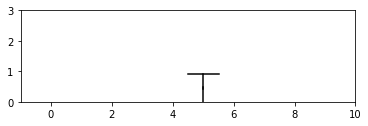

In [17]:
#animate it
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from IPython.display import HTML
%matplotlib inline

fig1, ax1 = plt.subplots(1,1) #create axes
ax1.set_aspect('equal')

def plot_robot(i,m,ax): #update function for animation
    ax.clear()
    ax.set_xlim([-1,10])
    ax.set_ylim([0,3])
    
    #plot body
    body_xb = m.q[i,'x'].value - 0.5*m.len[('body',1)]*cos(m.q[i,'theta_b'].value)
    body_yb = m.q[i,'y'].value - 0.5*m.len[('body',1)]*sin(m.q[i,'theta_b'].value)
    body_xf = m.q[i,'x'].value + 0.5*m.len[('body',1)]*cos(m.q[i,'theta_b'].value)
    body_yf = m.q[i,'y'].value + 0.5*m.len[('body',1)]*sin(m.q[i,'theta_b'].value)  
    ax.plot([body_xb,body_xf],[body_yb,body_yf],color='xkcd:black')
      
    #plot leg 1
    thA = m.q[i,'theta_b'].value+m.q[i,'theta_l'].value
    leg1_xt = m.q[i,'x'].value
    leg1_yt = m.q[i,'y'].value
    leg1_xb = m.q[i,'x'].value + m.len[('leg',1)]*sin(thA)
    leg1_yb = m.q[i,'y'].value - m.len[('leg',1)]*cos(thA)
    ax.plot([leg1_xt,leg1_xb],[leg1_yt,leg1_yb],color='xkcd:black')
    
    #plot leg 2
    Lt = 0.5*m.len[('leg',1)] + m.q[i,'r'].value - 0.5*m.len[('leg',2)]
    Lb = 0.5*m.len[('leg',1)] + m.q[i,'r'].value + 0.5*m.len[('leg',2)]
    leg2_xt = m.q[i,'x'].value + Lt*sin(thA)
    leg2_yt = m.q[i,'y'].value - Lt*cos(thA)
    leg2_xb = m.q[i,'x'].value + Lb*sin(thA)
    leg2_yb = m.q[i,'y'].value - Lb*cos(thA)
    ax.plot([leg2_xt,leg2_xb],[leg2_yt,leg2_yb],color='xkcd:black')
    
update = lambda i: plot_robot(i,m,ax1) #lambdify update function

animate = ani.FuncAnimation(fig1,update,range(1,N+1),interval = 50,repeat=True)

HTML(animate.to_html5_video()) #you need to convert the animation to HTML5 to embed it in the notebook
